<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

Откройте файлы и изучите их

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_full.info()
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Я думаю, стоит удалить пропуски из целевого признака в обучающей выборке. Так же столбец с датой, он не понадобится для обучения. И удалить из обучающей выборки столбцы, отсутствующие в тестовой выборке.


Аномальные значения исследуются в пункте 2, и пока это не требуется

In [6]:
#Найдите MAE между вашими расчётами и значением признака
def my_recovery(c, f, t):
    rec = (c * (f - t)) / (f * (c - t)) * 100    
    return rec

data_rec = data_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]
data_rec = data_rec.dropna()
data_rec['calc_rec'] = my_recovery(data_rec['rougher.output.concentrate_au'], data_rec['rougher.input.feed_au'], data_rec['rougher.output.tail_au'])
data_rec.head()

mae = mean_absolute_error(data_rec['rougher.output.recovery'], data_rec['calc_rec'])
mae

9.444891926100695e-15

Полученное значение МАЕ (в %) порядка 10 в степени -15. Это очень мало, можно сказать, что эффективность обогащения в таблице с обучающей выборкой рассчитана правильно

In [7]:
#Проанализируйте признаки, недоступные в тестовой выборке
train_columns = data_train.columns
test_columns = data_test.columns
columns_only_train = set(train_columns) - set(test_columns)
columns_only_train

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Признаки, отсутсвующие в тестовой выборке, в основном представляют собой параметры продукта (output) для всех стадий, которые проходит руда: флотация, первичная очистка, вторичная очистка и финальные характеристики. Это логично, так как эти данные оцениваются после обработки руды. Так же для флотации отсутствуют все расчетные характеристики.

Из обучающей выборки нужно выделить целевые признаки и удалить некоторые столбцы. Я это сделаю после пункта 2, так как обучающая выборка там меняется.

## Анализ данных

Concentrate_ag
median
rougher: 11.79
primary_cleaner: 8.27
final: 4.95
mean
rougher: 10.87
primary_cleaner: 7.69
final: 4.78


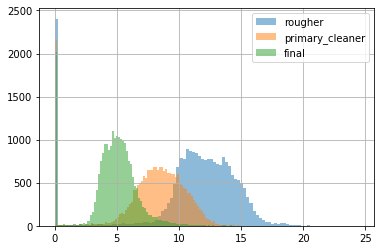

Concentrate_au
median
rougher: 20.00
primary_cleaner: 32.36
final: 44.65
mean
rougher: 17.88
primary_cleaner: 29.21
final: 40.00


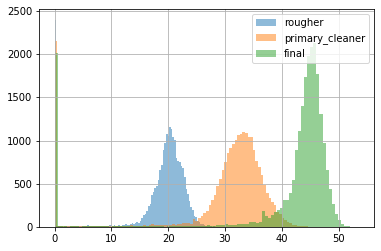

Concentrate_pb
median
rougher: 7.57
primary_cleaner: 9.92
final: 9.91
mean
rougher: 6.90
primary_cleaner: 8.92
final: 9.10


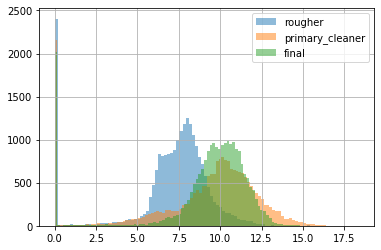

In [8]:
#Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
def plot_median3(r, p, f):
    print('median')
    print('rougher: {:.2f}'.format(r.median()))
    print('primary_cleaner: {:.2f}'.format(p.median()))
    print('final: {:.2f}'.format(f.median()))
    print('mean')
    print('rougher: {:.2f}'.format(r.mean()))
    print('primary_cleaner: {:.2f}'.format(p.mean()))
    print('final: {:.2f}'.format(f.mean()))
    
    #plt.plot(r, linestyle='None', marker='.')
    r.hist(bins=100, alpha=0.5)
    p.hist(bins=100, alpha=0.5)
    f.hist(bins=100, alpha=0.5)
    #plt.plot(p, linestyle='None', marker='.')
    #plt.plot(f, linestyle='None', marker='.')
    plt.legend(['rougher', 'primary_cleaner', 'final'], loc=1)
    plt.show()
    return
 
print('Concentrate_ag')
plot_median3(data_full['rougher.output.concentrate_ag'], data_full['primary_cleaner.output.concentrate_ag'], data_full['final.output.concentrate_ag'])
print('Concentrate_au')
plot_median3(data_full['rougher.output.concentrate_au'], data_full['primary_cleaner.output.concentrate_au'], data_full['final.output.concentrate_au'])
print('Concentrate_pb')
plot_median3(data_full['rougher.output.concentrate_pb'], data_full['primary_cleaner.output.concentrate_pb'], data_full['final.output.concentrate_pb'])

По средним значениям и полученным графикам концентрации веществ на трех этапах (флотация, вторичная очистка и финальная концентрация) видно:
- концентрация серебра в ходе обработки руды снижалась
- концентрация золота увеличивалась
- концентрация свинца практически не изменилась

Rougher
median
train: 54.10
test: 50.00
mean
train: 58.68
test: 55.94


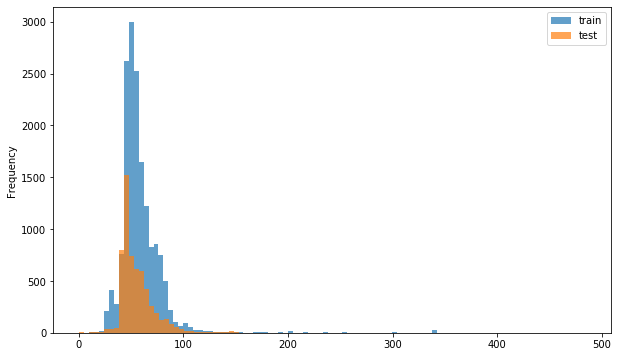

Primary cleaner
median
train: 7.29
test: 7.26
mean
train: 7.30
test: 7.26


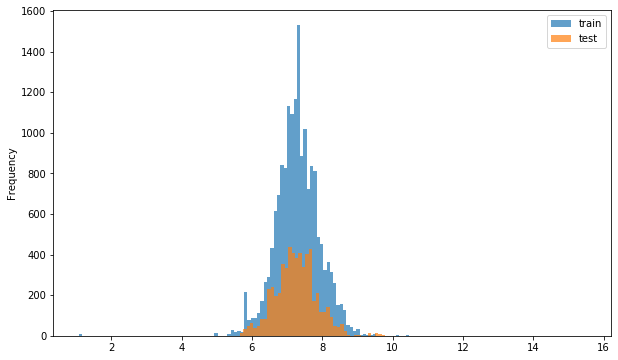

In [9]:
#Сравните распределения размеров гранул сырья на обучающей и тестовой выборках
def plot_median2(r, p):
    print('median')
    print('train: {:.2f}'.format(r.median()))
    print('test: {:.2f}'.format(p.median()))    
    print('mean')
    print('train: {:.2f}'.format(r.mean()))
    print('test: {:.2f}'.format(p.mean()))
    
    r.plot(alpha=0.7, kind='hist', bins=100, figsize=(10,6))
    p.plot(alpha=0.7, kind='hist', bins=100)
    plt.legend(['train', 'test'], loc=1)
    plt.show()
    return

print('Rougher')
plot_median2(data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size'])
print('Primary cleaner')
plot_median2(data_train['primary_cleaner.input.feed_size'], data_test['primary_cleaner.input.feed_size'])                                                                  

Данные о размере гранул представлены для процесса флотации и первичной очистки. Распределение рамеров гранул для первичной очистки в обучающей и тестовой выборках похожи, средние и медиана так же похожи. Для флотации распределение тестовой выборки скошено влево, относительно распределения обучающей выборки, соответственно, значения медианы и среднего меньше у тестовой выборки (но не более, чем на 10%). 


Хотя, для флотации выборки отличаются, по гистограмме видно, что в тестовую выборку входят те же значения размеров гранул, что и в обучающую. Я думаю, за счет этого модель, научившись на обучающих данных, не будет значительно ошибаться на тестовых (если это вызвано размером гранул, конечно).

rougher


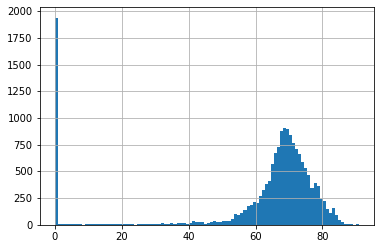

primary_cleaner


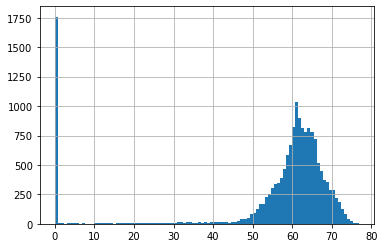

final


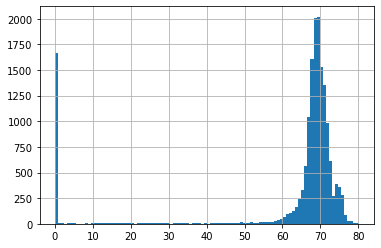

In [10]:
#Исследуйте суммарную концентрацию всех веществ на разных стадиях
def concentrate_sum(ag, pb, sol, au):
    conc_sum = ag + pb + sol + au
    conc_sum.hist(bins=100)
    plt.show()
    return

print('rougher')
concentrate_sum(data_train['rougher.output.concentrate_ag'], data_train['rougher.output.concentrate_pb'], data_train['rougher.output.concentrate_sol'], data_train['rougher.output.concentrate_au'])
print('primary_cleaner')
concentrate_sum(data_train['primary_cleaner.output.concentrate_ag'], data_train['primary_cleaner.output.concentrate_pb'], data_train['primary_cleaner.output.concentrate_sol'], data_train['primary_cleaner.output.concentrate_au'])
print('final')
concentrate_sum(data_train['final.output.concentrate_ag'], data_train['final.output.concentrate_pb'], data_train['final.output.concentrate_sol'], data_train['final.output.concentrate_au'])

In [11]:
#посмотрю столбцы с нулевой суммой концентраций
display(data_train.loc[(data_train['rougher.output.concentrate_ag'] == 0) & (data_train['rougher.output.concentrate_pb'] == 0) & (data_train['rougher.output.concentrate_sol'] == 0) & (data_train['rougher.output.concentrate_au'] == 0), 'rougher.output.concentrate_ag':'rougher.output.concentrate_au'])


,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
45,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0
48,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0
...,...,...,...,...
12360,0.0,0.0,0.0,0.0
12361,0.0,0.0,0.0,0.0
12362,0.0,0.0,0.0,0.0
12363,0.0,0.0,0.0,0.0


In [12]:
display(data_train.loc[(data_train['primary_cleaner.output.concentrate_ag'] == 0) & (data_train['primary_cleaner.output.concentrate_pb'] == 0) & (data_train['primary_cleaner.output.concentrate_sol'] == 0) & (data_train['primary_cleaner.output.concentrate_au'] == 0), 'primary_cleaner.output.concentrate_ag':'primary_cleaner.output.concentrate_au'].head())


,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au
19,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0


In [13]:
display(data_train.loc[(data_train['final.output.concentrate_ag'] == 0) & (data_train['final.output.concentrate_pb'] == 0) & (data_train['final.output.concentrate_sol'] == 0) & (data_train['final.output.concentrate_au'] == 0), 'final.output.concentrate_ag':'final.output.concentrate_au'].head())


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au
99,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0


На мой взгляд, аномалиями в значениях суммарной концентрации являются нулевые значения. Больше всего их представлено для процесса флотации. Скорее всего, эти данные появились в результате ошибки, так как нулевая концентрация всех веществ, особенно золота, невозможна. Их нужно удалить.


Я рассматривала только обучающую выборку, так как данных по концентрациям веществ в тестовой выборке нет

In [14]:
#удаление строк с суммарной концентрацией равной нулю
data_train = data_train.drop(data_train.loc[(data_train['rougher.output.concentrate_ag'] == 0) & (data_train['rougher.output.concentrate_pb'] == 0) & (data_train['rougher.output.concentrate_sol'] == 0) & (data_train['rougher.output.concentrate_au'] == 0)].index)
data_train = data_train.drop(data_train.loc[(data_train['primary_cleaner.output.concentrate_ag'] == 0) & (data_train['primary_cleaner.output.concentrate_pb'] == 0) & (data_train['primary_cleaner.output.concentrate_sol'] == 0) & (data_train['primary_cleaner.output.concentrate_au'] == 0)].index)
data_train = data_train.drop(data_train.loc[(data_train['final.output.concentrate_ag'] == 0) & (data_train['final.output.concentrate_pb'] == 0) & (data_train['final.output.concentrate_sol'] == 0) & (data_train['final.output.concentrate_au'] == 0)].index)

In [15]:
data_train['rougher.output.recovery'] = data_train['rougher.output.recovery'].fillna(value=0)
data_train['final.output.recovery'] = data_train['final.output.recovery'].fillna(value=0)
data_train = data_train.drop(data_train.loc[data_train['rougher.output.recovery'] == 0].index)
data_train = data_train.drop(data_train.loc[data_train['final.output.recovery'] == 0].index)

data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)

In [16]:
#Предобработка данных
#Удаляю строки с нулями и пропусками
data_train = data_train.dropna()

In [17]:
#попробую найти (по дате) в общем датасете целевые признаки для тестовой выборки для проверки модели
date_test = data_test['date']
data_full_test = data_full.query('date in @date_test')
target_test = data_full_test[['date', 'rougher.output.recovery', 'final.output.recovery']]

#придется их объединить с тестовой выборкой, удалить пропуски и нули, и снова разъединить.
#Не знаю, как иначе удалить пропуски и не перепутать последовательность
data_test_all = data_test.merge(target_test, on='date', how='outer')
data_test_all = data_test_all.dropna()
data_test_all = data_test_all.drop(data_test_all.loc[data_test_all['rougher.output.recovery'] == 0].index)
data_test_all = data_test_all.drop(data_test_all.loc[data_test_all['final.output.recovery'] == 0].index)

data_test = data_test_all.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_r_test = data_test_all[['rougher.output.recovery']]
target_f_test = data_test_all[['final.output.recovery']]
print(target_r_test.shape, target_f_test.shape)

(5154, 1) (5154, 1)


In [18]:
#отделение целевых признаков от обучающей выборки

target_r_train = data_train[['rougher.output.recovery']]
target_f_train = data_train[['final.output.recovery']]

features_1 = data_test.columns.values
features_train = data_train[features_1].reset_index(drop=True)

features_train = features_train.drop(['date'], axis=1)
features_test = data_test.drop(['date'], axis=1)
print(features_train.shape, features_test.shape, target_r_train.shape, target_f_train.shape)

(13725, 52) (5154, 52) (13725, 1) (13725, 1)


## Модель

In [19]:
#Напишите функцию для вычисления итоговой sMAPE
def smape(t1, p1):
    t1 = np.array(t1)
    summ1 = 0
    for i in range(len(t1)):
        summ1 += 200 * abs(t1[i] - p1[i]) / (abs(t1[i]) + abs(p1[i]))
    smape = summ1 / len(t1)
    return smape

In [20]:
my_scorer = make_scorer(smape, greater_is_better=False)

1 9.318746549677623


Text(0, 0.5, 'sMAPE')

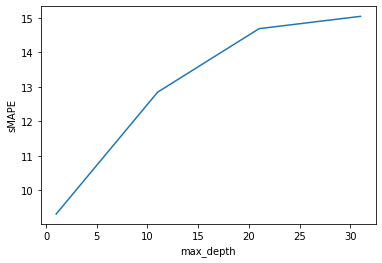

In [21]:
#Обучите разные модели и оцените их качество кросс-валидацией

#дерево
max_result = 100
max_d = 0
res_list = list()
n_list = list()
for d in range(1, 32, 10):
    model = DecisionTreeRegressor(random_state=42, max_depth=d)
    result1 = abs(cross_val_score(model, features_train, target_r_train, cv=5, scoring=my_scorer).mean())
    result2 = abs(cross_val_score(model, features_train, target_f_train, cv=5, scoring=my_scorer).mean())
    result = 0.25 * result1 + 0.75 * result2
    res_list.append(result)
    n_list.append(d)
    
    if result < max_result:
        max_result = result
        max_d = d
print(max_d, max_result)
plt.plot(n_list, res_list)
plt.xlabel('max_depth')
plt.ylabel('sMAPE')

In [22]:
#регрессия
model = LinearRegression()
result1 = abs(cross_val_score(model, features_train, target_r_train, cv=5, scoring=my_scorer).mean())
result2 = abs(cross_val_score(model, features_train, target_f_train, cv=5, scoring=my_scorer).mean())
result = 0.25 * result1 + 0.75 * result2
result

10.077499650845468

1 9.116445253533167
3 8.52981611868338
5 8.470907889199543
7 8.645633752586269
9 8.756422025894796
5 8.470907889199543


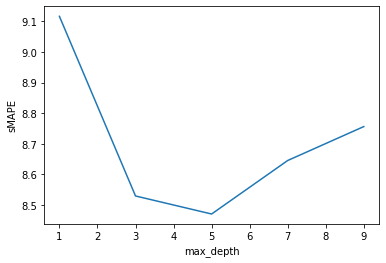

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [23]:
#случайный лес
import warnings
warnings.filterwarnings('ignore')

max_d = 0
max_n = 0
res_list = list()
n_list = list()
max_result = 100
n = 20
for d in range(1, 10, 2):
    model = RandomForestRegressor(random_state=42, max_depth=d, n_estimators=n)
    result1 = abs(cross_val_score(model, features_train, target_r_train, cv=5, scoring=my_scorer).mean())
    result2 = abs(cross_val_score(model, features_train, target_f_train, cv=5, scoring=my_scorer).mean())
    result = 0.25 * result1 + 0.75 * result2
    res_list.append(result)
    n_list.append(d)
    print(d, result)
    if result < max_result:
        max_result = result
        max_d = d
print(max_d, max_result)
plt.plot(n_list, res_list)
plt.xlabel('max_depth')
plt.ylabel('sMAPE')
plt.show()
%time

1 9.540865486896747
11 8.519419228026143
21 8.463645959368145
31 8.53322811589578
21 8.463645959368145


Text(0, 0.5, 'sMAPE')

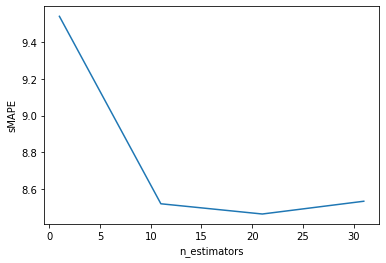

In [24]:
max_n = 0
res_list = list()
n_list = list()
max_result = 100
for n in range(1, 32, 10):
    model = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=n)
    result1 = abs(cross_val_score(model, features_train, target_r_train, cv=5, scoring=my_scorer).mean())
    result2 = abs(cross_val_score(model, features_train, target_f_train, cv=5, scoring=my_scorer).mean())
    result = 0.25 * result1 + 0.75 * result2
    print(n, result)
    res_list.append(result)
    n_list.append(n)
    if result < max_result:
        max_result = result
        max_n = n
print(max_n, max_result)
plt.plot(n_list, res_list)
plt.xlabel('n_estimators')
plt.ylabel('sMAPE')

Для предсказания целевого признака оптимальной моделью оказался случайный лес с гиперпараметрами: n(число деревьев) 20, d(максимальная глубина) 5.

In [25]:
#Выберите лучшую модель и проверьте её на тестовой выборке
model = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=20)

model.fit(features_train, target_r_train)
pr1 = model.predict(features_test)

model.fit(features_train, target_f_train)
pr2 = model.predict(features_test)

print(0.25*smape(target_r_test, pr1) + 0.75*smape(target_f_test, pr2))

[7.37819804]


In [26]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_r_train)
pr1 = model.predict(features_test)

dummy.fit(features_train, target_f_train)
pr2 = model.predict(features_test)

print(0.25*smape(target_r_test, pr1) + 0.75*smape(target_f_test, pr2))

[12.43498387]


<div style="background: #cccccc;">
Лучшая модель (случайный лес с гиперпараметрами n=5, d=20) показала на тестовой выборке sMAPE 7.4%, тогда как константная модель на этой же выборке показала 12.4%. Модель прошла проверку на адекватность.

<b> Вывод </b>

В ходе данной работы была подготовлена модель машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды.

Для обучения и тестирования модели были использованы данные с параметрами добычи и очистки руды, которые были предварительно подготовлены, проанализированы и очищены от аномальных значений.

На указанных данных были обучены (с применением кросс-валидвции) и проверены различные модели с изменяемыми гиперпараметрами. Наиболее точной оказалась модель случайного леса с максимальной глубиной 5 и количеством деревьев 20. Модель показала на тестовой выборке значение sMAPE 7.3%